In [6]:
import re
import numpy as np
import pandas as pd
import csv
from sklearn.datasets import fetch_20newsgroups

## Getting the Data from the sklearn library

In [7]:
dataset = fetch_20newsgroups(subset='all', shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))

## Adding the data to Data Frames

In [10]:
df = pd.DataFrame(list(dataset.data), columns=['text'])
df["label"] = list(dataset.target)
df.tail()

,text,label
18841,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,13
18842,\nNot in isolated ground recepticles (usually ...,12
18843,I just installed a DX2-66 CPU in a clone mothe...,3
18844,\nWouldn't this require a hyper-sphere. In 3-...,1
18845,After a tip from Gary Crum (crum@fcom.cc.utah....,7


In [11]:
print(df.info)
df.shape

<bound method DataFrame.info of                                                     text  label
0      \n\nI am sure some bashers of Pens fans are pr...     10
1      My brother is in the market for a high-perform...      3
2      \n\n\n\n\tFinally you said what you dream abou...     17
3      \nThink!\n\nIt's the SCSI card doing the DMA t...      3
4      1)    I have an old Jasmine drive which I cann...      4
...                                                  ...    ...
18841  DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...     13
18842  \nNot in isolated ground recepticles (usually ...     12
18843  I just installed a DX2-66 CPU in a clone mothe...      3
18844  \nWouldn't this require a hyper-sphere.  In 3-...      1
18845  After a tip from Gary Crum (crum@fcom.cc.utah....      7

[18846 rows x 2 columns]>


(18846, 2)

## Cleaning and tokenizing the dataset


In [13]:
def data_cleaning_and_tokenizing_text(news_data):
  cleaned_text = []
  for text in news_data:
    # only keep numbers and letters and spaces
    text = re.sub('[^\w]|_', ' ', text)
    text = text.lower()
    text = re.sub(r'[^\x00-\x7f]',r'', text)   # remove non ascii texts
    tokens = [token for token in text.split(' ') if token] # remove empty words
    
    tokens = ['[number]' if token.isdigit() else token for token in tokens]  # convert all numbers to '[number]'
    cleaned_text.append(tokens)
  return cleaned_text

In [14]:
clean_train_tokens = data_cleaning_and_tokenizing_text(dataset.data)

In [22]:
len(clean_train_tokens)

18846

In [23]:
def get_unique_tokens_per_row(text_token_list):
    words = []
    for row in text_token_list:
        words.extend(list(set(row)))
    return words

<AxesSubplot:>

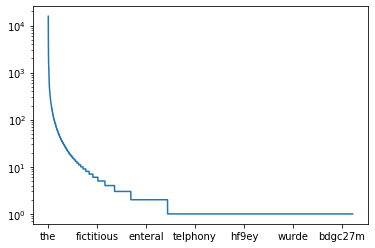

In [25]:
words = pd.DataFrame(get_unique_tokens_per_row(clean_train_tokens) , columns=['words'])
token_frequency = words['words'].value_counts() 
token_frequency.plot(logy=True)

<AxesSubplot:>

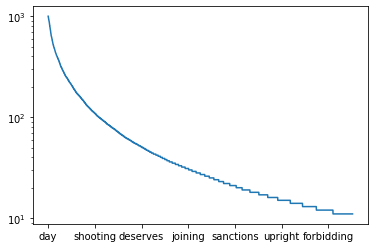

In [27]:
vocab = token_frequency[np.logical_and(token_frequency < 1000, token_frequency > 10)]
vocab.plot(logy=True)

In [30]:
def filter_text_by_vocab(news_data, vocab):
    text_strs = []
    for row in news_data:
        words_to_keep = [token for token in row if token in vocab or token == '[number]']
        text_strs.append(' '.join(words_to_keep))
    return text_strs

In [31]:
clean_data = filter_text_by_vocab(clean_train_tokens, set(vocab.index))

In [36]:
len(clean_data[0])

315

In [39]:
clean_data[1]

'brother market high performance video card supports vesa local bus [number] 2mb ram suggestions ideas diamond stealth pro local bus orchid [number] ati graphics ultra pro high performance vlb card email thank matt'

In [41]:
clean_data[:2]

['pens fans pretty confused lack kind posts recent pens massacre devils relieved end non relief praise pens man killing devils worse thought jagr showed regular season stats fo fun watch playoffs bowman jagr fun next couple games pens beat jersey anyway disappointed islanders lose final regular season game pens rule',
 'brother market high performance video card supports vesa local bus [number] 2mb ram suggestions ideas diamond stealth pro local bus orchid [number] ati graphics ultra pro high performance vlb card email thank matt']

In [56]:
with open('../dataset/cleaned_data.csv', 'w') as f:
    writer = csv.writer(f, lineterminator='\n')
    for target, text in zip(dataset.target, clean_data):
        writer.writerow([dataset.target_names[target], text])

In [58]:
with open('../dataset/vocabulary.txt', 'w') as f:
    vocab.to_csv(f)

In [66]:
df = pd.read_csv('../dataset/cleaned_data.csv', header=None)
df.columns = ["label", "text"]

In [67]:
df_new.tail()

,label,text
18841,sci.med,dn david dn dn consultation cheaper scan diffe...
18842,sci.electronics,isolated ground usually unusual color orange y...
18843,comp.sys.ibm.pc.hardware,installed dx2 [number] cpu clone motherboard t...
18844,comp.graphics,wouldn require sphere [number] space [number] ...
18845,rec.autos,tip gary cc utah phone pontiac systems custome...


In [68]:
df.shape

(18846, 2)

## Removing the Null values

In [69]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18270 entries, 0 to 18845
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   18270 non-null  object
 1   text    18270 non-null  object
dtypes: object(2)
memory usage: 428.2+ KB


In [70]:
df.to_csv("../dataset/newsgroup-preprocessed-data.csv", index=None)